In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr

from pathlib import Path
import os
os.chdir('/home/weedsci/matt/SemiF-AnnotationPipeline')
from semif_utils.utils import get_image_meta

| 0.00, 0.00, 11.65|
| 0.00,-0.00, 10.62|
| 0.00, 0.00, 1.00|
(11.647596033444646, 10.616847552036077)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 72573, 'height': 9440, 'count': 1, 'crs': CRS.from_wkt('LOCAL_CS["Local Coordinates (m)",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.0010302939044982864, 0.0, -10.326512361694807,
       0.0, -0.0010302939044982864, 15.233594538092898), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
| 0.00, 0.00,-10.33|
| 0.00,-0.00, 15.23|
| 0.00, 0.00, 1.00|


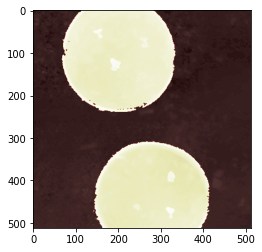

In [132]:
# open raster layer
import rasterio
import random
from rasterio.windows import Window
from affine import Affine
dem = Path("data/semifield-developed-images/NC_2022-08-05/autosfm/dem/dem.tif")

with rasterio.open(dem) as src:

    # The size in pixels of your desired window
    xsize, ysize = 512, 512

    # Generate a window origin (upper left)
    xoff, yoff = 21328, 4481

    # Create a Window and calculate the transform from the source dataset    
    window = Window(xoff,yoff, xsize,ysize)
    transform = src.window_transform(window)
    upper_left = transform * (0,0)
    
    print(transform)
    print(upper_left)
    
    wind_crop = src.read(window=window)
    # Create a new cropped raster to write to
    profile = src.profile
    src_meta = src.meta.copy()
    src_affine = src_meta.get("transform") 
    print(profile)
    print(src_affine)
    
    plt.imshow(src.read(window=window).squeeze(), cmap='pink')
